# Introduction to Tensors

Tensors are multi-dimensional arrays with a uniform type (called a dtype). You can see all supported dtypes at tf.dtypes.DType.

If you're familiar with NumPy, tensors are (kind of) like np.arrays.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

In [81]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Basic Tensors

"scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

In [3]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:

In [4]:
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


A "matrix" or "rank-2" tensor has two axes:

In [5]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [6]:
##Image in slide 1

Tensors may have more axes; here is a tensor with three axes:

In [7]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


There are many ways you might visualize a tensor with more than two axes.

In [8]:
# image in slide 2

You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method:

In [11]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [12]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

Tensors often contain floats and ints, but have many other types, including:

* complex numbers
* strings

The base `tf.Tensor` class requires tensors to be "rectangular"---that is, along each axis, every element is the same size.  However, there are specialized types of tensors that can handle different shapes:

* Ragged tensors (see [RaggedTensor](#ragged_tensors) below)
* Sparse tensors (see [SparseTensor](#sparse_tensors) below)

You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [13]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [14]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors are used in all kinds of operations (ops).

In [15]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c)) ##normalized exp fn - in neural networks

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


## About shapes

Tensors have shapes.  Some vocabulary:

* **Shape**: The length (number of elements) of each of the axes of a tensor.
* **Rank**: Number of tensor axes.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or **Dimension**: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product shape vector.


Note: Although you may see reference to a "tensor of two dimensions", a rank-2 tensor does not usually describe a 2D space.

Tensors and `tf.TensorShape` objects have convenient properties for accessing these:

In [17]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print(rank_4_tensor)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]], shape=(3, 2, 4, 5), dtype=float32)


In [18]:
# image in slide 3

In [19]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

## Indexing

### Single-axis indexing

TensorFlow follows standard Python indexing rules, similar to [indexing a list or a string in Python](https://docs.python.org/3/tutorial/introduction.html#strings), and the basic rules for NumPy indexing.

* indexes start at `0`
* negative indices count backwards from the end
* colons, `:`, are used for slices: `start:stop:step`


In [20]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the axis:

In [21]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


Indexing with a `:` slice keeps the axis:

In [22]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### Multi-axis indexing

Higher rank tensors are indexed by passing multiple indices.

The exact same rules as in the single-axis case apply to each axis independently.

In [23]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Passing an integer for each index, the result is a scalar.

In [24]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


You can index using any combination of integers and slices:

In [25]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [26]:
print(rank_3_tensor.numpy())

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]]


In [27]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


In [28]:
# see slide 4

Read the [tensor slicing guide](https://tensorflow.org/guide/tensor_slicing) to learn how you can apply indexing to manipulate individual elements in your tensors.

## Manipulating Shapes

Reshaping a tensor is of great utility. 


In [29]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [30]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The `tf.reshape` operation is fast and cheap as the underlying data does not need to be duplicated.

In [33]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])
print(reshaped)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)


In [34]:
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

In [35]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If you flatten a tensor you can see what order it is laid out in memory.

In [36]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable use of `tf.reshape` is to combine or split adjacent axes (or add/remove `1`s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [37]:
print(rank_3_tensor)
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)
tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


In [38]:
# see slide 5

(( Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work; you need `tf.transpose` for that. ))


In [ ]:
# # Bad examples: don't do this

# # You can't reorder axes with reshape.
# print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# # This is a mess
# print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# # This doesn't work at all
# try:
#   tf.reshape(rank_3_tensor, [7, -1])
# except Exception as e:
#   print(f"{type(e).__name__}: {e}")

In [ ]:
# see slide 6

You may run across not-fully-specified shapes. Either the shape contains a `None` (an axis-length is unknown) or the whole shape is `None` (the rank of the tensor is unknown).

Except for [tf.RaggedTensor](#ragged_tensors), such shapes will only occur in the context of TensorFlow's symbolic, graph-building  APIs:

* [tf.function](function.ipynb) 
* The [keras functional API](https://www.tensorflow.org/guide/keras/functional).


## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

If you don't, TensorFlow chooses a datatype that can represent your data. TensorFlow converts Python integers to `tf.int32` and Python floating point numbers to `tf.float32`. Otherwise TensorFlow uses the same rules NumPy uses when converting to arrays.

You can cast from type to type.

In [39]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## Broadcasting

Broadcasting is a concept borrowed from the [equivalent feature in NumPy](https://numpy.org/doc/stable/user/basics.html).  In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar.  In that case, the scalar is broadcast to be the same shape as the other argument. 

In [40]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Likewise, axes with length 1 can be stretched out to match the other arguments.  Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is `[4]`.

In [41]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [42]:
# see slide 7

Here is the same operation without broadcasting:

In [43]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


Most of the time, broadcasting is both time and space efficient, as the broadcast operation never materializes the expanded tensors in memory.  

You see what broadcasting looks like using `tf.broadcast_to`.

In [44]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


Unlike a mathematical op, for example, `broadcast_to` does nothing special to save memory.  Here, you are materializing the tensor.

It can get even more complicated.  [This section](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) of Jake VanderPlas's book _Python Data Science Handbook_ shows more broadcasting tricks (again in NumPy).

## tf.convert_to_tensor

Most ops, like `tf.matmul` and `tf.reshape` take arguments of class `tf.Tensor`.  However, you'll notice in the above case, Python objects shaped like tensors are accepted.

Most, but not all, ops call `convert_to_tensor` on non-tensor arguments.  There is a registry of conversions, and most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all convert automatically.

See `tf.register_tensor_conversion_function` for more details, and if you have your own type you'd like to automatically convert to a tensor.

# Variables in Tensorflow

A TensorFlow **variable** is the recommended way to represent shared, persistent state your program manipulates. We cover how to create, update, and manage instances of `tf.Variable` in TensorFlow.

Variables are created and tracked via the `tf.Variable` class. A `tf.Variable` represents a tensor whose value can be changed by running ops on it.  Specific ops allow you to read and modify the values of this tensor. Higher level libraries like `tf.keras` use `tf.Variable` to store model parameters. 

## Create a variable

To create a variable, provide an initial value.  The `tf.Variable` will have the same `dtype` as the initialization value.

In [45]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

A variable looks and acts like a tensor, and, in fact, is a data structure backed by a `tf.Tensor`.  Like tensors, they have a `dtype` and a shape, and can be exported to NumPy.

In [46]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


Most tensor operations work on variables as expected, although variables cannot be reshaped.

In [47]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.argmax(my_variable))

# This creates a new tensor; it does not reshape the variable.
print("\nCopying and reshaping: ", tf.reshape(my_variable, [1,4]))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)

Copying and reshaping:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


As noted above, variables are backed by tensors. You can reassign the tensor using `tf.Variable.assign`.  Calling `assign` does not (usually) allocate a new tensor; instead, the existing tensor's memory is reused.

In [51]:
a = tf.Variable([2.0, 3.0])
# This will keep the same dtype, float32
a.assign([1, 2]) 
print(a)

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>


In [49]:
# Not allowed as it resizes the variable: 
try:
  a.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Cannot assign to variable Variable:0 due to variable shape (2,) and value shape (3,) are incompatible


If you use a variable like a tensor in operations, you will usually operate on the backing tensor.  

Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.

In [52]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy())
print(b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

[5. 6.]
[2. 3.]
[7. 9.]
[0. 0.]


## Lifecycles, naming, and watching

In Python-based TensorFlow, `tf.Variable` instance have the same lifecycle as other Python objects. When there are no references to a variable it is automatically deallocated.

Variables can also be named which can help you track and debug them.  You can give two variables the same name.

In [53]:
# Create a and b; they will have the same name but will be backed by
# different tensors.
a = tf.Variable(my_tensor, name="Mark")
# A new variable with the same name, but different value
# Note that the scalar add is broadcast
b = tf.Variable(my_tensor + 1, name="Mark")

# These are elementwise-unequal, despite having the same name
print(a == b)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


Variable names are preserved when saving and loading models. By default, variables in models will acquire unique variable names automatically, so you don't need to assign them yourself unless you want to.

Although variables are important for differentiation, some variables will not need to be differentiated.  You can turn off gradients for a variable by setting `trainable` to false at creation. An example of a variable that would not need gradients is a training step counter.

In [54]:
step_counter = tf.Variable(1, trainable=False)

## Placing variables and tensors

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible with its `dtype`.  This means most variables are placed on a GPU if one is available.

However, you can override this.  In this snippet, place a float tensor and a variable on the CPU, even if a GPU is available.  By turning on device placement logging (see [Setup](#scrollTo=xZoJJ4vdvTrD)), you can see where the variable is placed. 

Note: Although manual placement works, using [distribution strategies](distributed_training) can be a more convenient and scalable way to optimize your computation.

If you run this notebook on different backends with and without a GPU you will see different logging.  *Note that logging device placement must be turned on at the start of the session.*

In [55]:
with tf.device('CPU:0'):

  # Create some tensors
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


It's possible to set the location of a variable or tensor on one device and do the computation on another device.  This will introduce delay, as data needs to be copied between the devices.

You might do this, however, if you had multiple GPU workers but only want one copy of the variables.

In [56]:
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  # Element-wise multiply
  k = a * b

print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


Note: Because `tf.config.set_soft_device_placement` is turned on by default, even if you run this code on a device without a GPU, it will still run.  The multiplication step will happen on the CPU.

For more on distributed training, see [our guide](distributed_training).

# Gradients and Automatic Diffrentiation

Automatic differentiation is useful for implementing machine learning algorithms such as backpropagation for training neural networks.

## Computing gradients

To differentiate automatically, TensorFlow needs to remember what operations happen in what order during the *forward* pass.  Then, during the *backward pass*, TensorFlow traverses this list of operations in reverse order to compute gradients.

## Gradient tapes

TensorFlow provides the `tf.GradientTape` API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually `tf.Variable`s.
TensorFlow "records" relevant operations executed inside the context of a `tf.GradientTape` onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using [reverse mode differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).

Here is a simple example:

In [57]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

Once you've recorded some operations, use `GradientTape.gradient(target, sources)` to calculate the gradient of some target (often a loss) relative to some source (often the model's variables):

In [58]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

The above example uses scalars, but `tf.GradientTape` works as easily on any tensor:

In [59]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

In [60]:
w

<tf.Variable 'w:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.54971814,  0.40697613],
       [ 0.25912225,  0.51409984],
       [-1.9965413 ,  0.9840291 ]], dtype=float32)>

In [61]:
b

<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [62]:
with tf.GradientTape(persistent=True) as tape: 
  y = x @ w + b
  loss = tf.reduce_mean(y**2)
## To compute multiple gradients over the same computation, create a persistent gradient tape. 
## This allows multiple calls to the gradient() method as resources are released when the tape object is garbage collected

To get the gradient of `loss` with respect to both variables, you can pass both as sources to the `gradient` method. The tape is flexible about how sources are passed and will accept any nested combination of lists or dictionaries and return the gradient structured the same way (see `tf.nest`).

In [63]:
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

In [64]:
dl_dw

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ -4.9216614,   4.3872633],
       [ -9.843323 ,   8.774527 ],
       [-14.764984 ,  13.16179  ]], dtype=float32)>

In [65]:
dl_db

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-4.9216614,  4.3872633], dtype=float32)>

The gradient with respect to each source has the shape of the source:

In [66]:
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


Here is the gradient calculation again, this time passing a dictionary of variables:

In [67]:
my_vars = {
    'w': w,
    'b': b
}

grad = tape.gradient(loss, my_vars)
grad['b']

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-4.9216614,  4.3872633], dtype=float32)>

## Gradients with respect to a model

It's common to collect `tf.Variables` into a `tf.Module` or one of its subclasses (`layers.Layer`, `keras.Model`) for [checkpointing](checkpoint.ipynb) and [exporting](saved_model.ipynb).

In most cases, you will want to calculate gradients with respect to a model's trainable variables.  Since all subclasses of `tf.Module` aggregate their variables in the `Module.trainable_variables` property, you can calculate these gradients in a few lines of code: 

In [68]:
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

In [69]:
for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

dense/kernel:0, shape: (3, 2)
dense/bias:0, shape: (2,)


<a id="watches"></a>

## Controlling what the tape watches

The default behavior is to record all operations after accessing a trainable `tf.Variable`. The reasons for this are:

* The tape needs to know which operations to record in the forward pass to calculate the gradients in the backwards pass.
* The tape holds references to intermediate outputs, so you don't want to record unnecessary operations.
* The most common use case involves calculating the gradient of a loss with respect to all a model's trainable variables.

For example, the following fails to calculate a gradient because the `tf.Tensor` is not "watched" by default, and the `tf.Variable` is not trainable:

In [70]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')
# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)
# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0
# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
  y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

for g in grad:
  print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


You can list the variables being watched by the tape using the `GradientTape.watched_variables` method:

In [71]:
[var.name for var in tape.watched_variables()]

['x0:0']

`tf.GradientTape` provides hooks that give the user control over what is or is not watched.

To record gradients with respect to a `tf.Tensor`, you need to call `GradientTape.watch(x)`:

In [72]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0


Conversely, to disable the default behavior of watching all `tf.Variables`, set `watch_accessed_variables=False` when creating the gradient tape. This calculation uses two variables, but only connects the gradient for one of the variables:

In [73]:
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
  tape.watch(x1)
  y0 = tf.math.sin(x0)
  y1 = tf.nn.softplus(x1)
  y = y0 + y1
  ys = tf.reduce_sum(y)

Since `GradientTape.watch` was not called on `x0`, no gradient is computed with respect to it:

In [74]:
# dys/dx1 = exp(x1) / (1 + exp(x1)) = sigmoid(x1)
grad = tape.gradient(ys, {'x0': x0, 'x1': x1})

print('dy/dx0:', grad['x0'])
print('dy/dx1:', grad['x1'].numpy())

dy/dx0: None
dy/dx1: 0.9999546


## Intermediate results

You can also request gradients of the output with respect to intermediate values computed inside the `tf.GradientTape` context.

In [75]:
x = tf.constant(3.0)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = x * x
  z = y * y

# Use the tape to compute the gradient of z with respect to the
# intermediate value y.
# dz_dy = 2 * y and y = x ** 2 = 9
print(tape.gradient(z, y).numpy())

18.0


By default, the resources held by a `GradientTape` are released as soon as the `GradientTape.gradient` method is called. To compute multiple gradients over the same computation, create a gradient tape with `persistent=True`. This allows multiple calls to the `gradient` method as resources are released when the tape object is garbage collected. For example:

In [ ]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  y = x * x
  z = y * y

print(tape.gradient(z, x).numpy())  # [4.0, 108.0] (4 * x**3 at x = [1.0, 3.0])
print(tape.gradient(y, x).numpy())  # [2.0, 6.0] (2 * x at x = [1.0, 3.0])

[  4. 108.]
[2. 6.]


In [76]:
del tape   # Drop the reference to the tape

## Notes on performance

* There is a tiny overhead associated with doing operations inside a gradient tape context. For most eager execution this will not be a noticeable cost, but you should still use tape context around the areas only where it is required.

* Gradient tapes use memory to store intermediate results, including inputs and outputs, for use during the backwards pass.

  For efficiency, some ops (like `ReLU`) don't need to keep their intermediate results and they are pruned during the forward pass. However, if you use `persistent=True` on your tape, *nothing is discarded* and your peak memory usage will be higher.

## Gradients of non-scalar targets

A gradient is fundamentally an operation on a scalar.

In [77]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

4.0
-0.25


Thus, if you ask for the gradient of multiple targets, the result for each source is:

* The gradient of the sum of the targets, or equivalently
* The sum of the gradients of each target.

In [78]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
  y0 = x**2
  y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

3.75


Similarly, if the target(s) are not scalar the gradient of the sum is calculated:

In [ ]:
x = tf.Variable(2.)

with tf.GradientTape() as tape:
  y = x * [3., 4.]

print(tape.gradient(y, x).numpy())

7.0


This makes it simple to take the gradient of the sum of a collection of losses, or the gradient of the sum of an element-wise loss calculation.

If you need a separate gradient for each item, refer to [Jacobians](advanced_autodiff.ipynb#jacobians).

In some cases you can skip the Jacobian. For an element-wise calculation, the gradient of the sum gives the derivative of each element with respect to its input-element, since each element is independent:

In [79]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

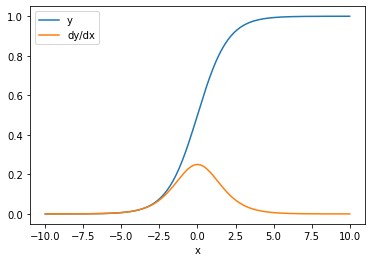

In [82]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.legend()
_ = plt.xlabel('x')

# Basic training loops

TensorFlow also includes the [tf.Keras API](https://www.tensorflow.org/guide/keras/overview), a high-level neural network API that provides useful abstractions to reduce boilerplate.  However, for the moment, we will use basic classes.

## Solving machine learning problems

Solving a machine learning problem usually consists of the following steps:

 - Obtain training data.
 - Define the model.
 - Define a loss function.
 - Run through the training data, calculating loss from the ideal value
 - Calculate gradients for that loss and use an *optimizer* to adjust the variables to fit the data.
 - Evaluate your results.

For illustration purposes, in this guide you'll develop a simple linear model, $f(x) = x * W + b$, which has two variables: $W$ (weights) and $b$ (bias).

This is the most basic of machine learning problems:  Given $x$ and $y$, try to find the slope and offset of a line via  [simple linear regression](https://en.wikipedia.org/wiki/Linear_regression#Simple_and_multiple_linear_regression).

## Data

Supervised learning uses *inputs* (usually denoted as *x*) and *outputs* (denoted *y*, often called *labels*).  The goal is to learn from paired inputs and outputs so that you can predict the value of an output from an input.

Each input of your data, in TensorFlow, is almost always represented by a tensor, and is often a vector. In supervised training, the output (or value you'd like to predict) is also a tensor.

Here is some data synthesized by adding Gaussian (Normal) noise to points along a line.

In [83]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

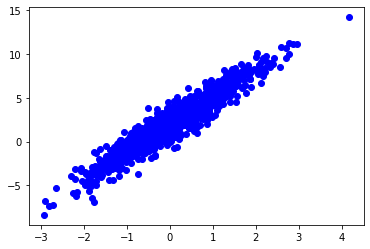

In [84]:
# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x, y, c="b")
plt.show()

Tensors are usually gathered together in *batches*, or groups of inputs and outputs stacked together.  Batching can confer some training benefits and works well with accelerators and vectorized computation.  Given how small this dataset is, you can treat the entire dataset as a single batch.

## Define the model

Use `tf.Module` to encapsulate the variables and the computation.  You could use any Python object, but this way it can be easily saved.

Here, you define both *w* and *b* as variables.

In [88]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


The initial variables are set here in a fixed way, but Keras comes with any of a number of [initalizers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers) you could use, with or without the rest of Keras.

### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize this difference during training. Define the standard L2 loss, also known as the "mean squared" error:

In [85]:
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

Before training the model, you can visualize the loss value by plotting the model's predictions in red and the training data in blue:

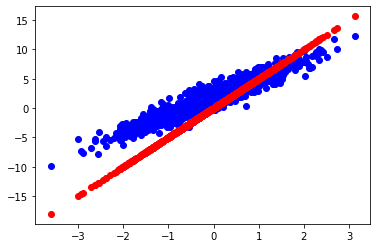

Current loss: 9.300709


In [ ]:
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

### Define a training loop

The training loop consists of repeatedly doing three tasks in order:

* Sending a batch of inputs through the model to generate outputs
* Calculating the loss by comparing the outputs to the output (or label)
* Using gradient tape to find the gradients
* Optimizing the variables with those gradients

For this example, you can train the model using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

There are many variants of the gradient descent scheme that are captured in `tf.keras.optimizers`. But in the spirit of building from first principles, here you will implement the basic math yourself with the help of `tf.GradientTape` for automatic differentiation and `tf.assign_sub` for decrementing a value (which combines `tf.assign` and `tf.sub`):

In [86]:
# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

For a look at training, you can send the same batch of *x* and *y* through the training loop, and see how `W` and `b` evolve.

In [89]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)

# Define a training loop
def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))


Starting: W=5.00 b=0.00, loss=8.51679
Epoch  0: W=4.62 b=0.38, loss=5.86963
Epoch  1: W=4.31 b=0.69, loss=4.15616
Epoch  2: W=4.07 b=0.94, loss=3.04704
Epoch  3: W=3.87 b=1.14, loss=2.32911
Epoch  4: W=3.71 b=1.31, loss=1.86439
Epoch  5: W=3.58 b=1.44, loss=1.56358
Epoch  6: W=3.48 b=1.54, loss=1.36887
Epoch  7: W=3.39 b=1.63, loss=1.24283
Epoch  8: W=3.33 b=1.69, loss=1.16124
Epoch  9: W=3.27 b=1.75, loss=1.10843


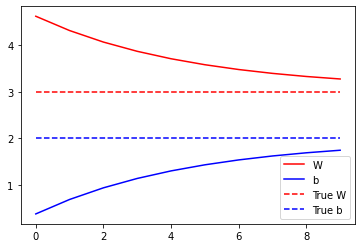

In [90]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model, x, y)

# Plot it
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()


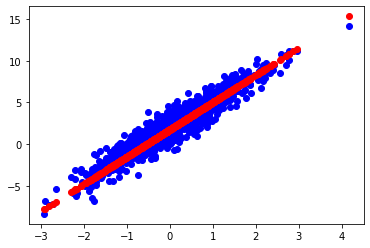

Current loss: 1.108428


In [91]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

## The same solution, but with Keras

It's useful to contrast the code above with the equivalent in Keras.

Defining the model looks exactly the same if you subclass `tf.keras.Model`.  Remember that Keras models inherit ultimately from module.

In [92]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

keras_model = MyModelKeras()

# Reuse the training loop with a Keras model
training_loop(keras_model, x, y)

# You can also save a checkpoint using Keras's built-in support
keras_model.save_weights("my_checkpoint")

Epoch  0: W=4.62 b=0.38, loss=5.86963
Epoch  1: W=4.31 b=0.69, loss=4.15616
Epoch  2: W=4.07 b=0.94, loss=3.04704
Epoch  3: W=3.87 b=1.14, loss=2.32911
Epoch  4: W=3.71 b=1.31, loss=1.86439
Epoch  5: W=3.58 b=1.44, loss=1.56358
Epoch  6: W=3.48 b=1.54, loss=1.36887
Epoch  7: W=3.39 b=1.63, loss=1.24283
Epoch  8: W=3.33 b=1.69, loss=1.16124
Epoch  9: W=3.27 b=1.75, loss=1.10843


Rather than write new training loops each time you create a model, you can use the built-in features of Keras as a shortcut.  This can be useful when you do not want to write or debug Python training loops.

If you do, you will need to use `model.compile()` to set the parameters, and `model.fit()` to train.  It can be less code to use Keras implementations of L2 loss and gradient descent, again as a shortcut.  Keras losses and optimizers can be used outside of these convenience functions, too, and the previous example could have used them.

In [93]:
keras_model = MyModelKeras()

# compile sets the training parameters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.mean_squared_error,
)

Keras `fit` expects batched data or a complete dataset as a NumPy array.  NumPy arrays are chopped into batches and default to a batch size of 32.

In this case, to match the behavior of the hand-written loop, you should pass `x` in as a single batch of size 1000.

In [94]:
print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

1000
Epoch 1/10
1/1 [==============================] - 0s 386ms/step - loss: 8.5168
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 5.8696
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 4.1562
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 3.0470
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3291
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 1.8644
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.5636
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 1.3689
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1.2428
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1.1612


Note that Keras prints out the loss after training, not before, so the first loss appears lower, but otherwise this shows essentially the same training performance.